In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'

In [2]:
#Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

presentation_period= 0.35 #stim presnetation time
presentation_period_cue=  0.50 #presentation of attentional cue time
pre_stim_period= 0.5 #time between cue and stim
resp_time = 4  #time the response is active

In [3]:
# Functions
def boots_by_subj(data, col_int, col_subj, n_iterations, alpha, stat):
    #### you give a 2 column df, one column qith the value and the other column with subject index:
    list_subjects = data[col_subj].unique()
    sample=[]
    for n in range(n_iterations):
        resampled=[]
        new_sample = list(np.random.randint(0, len(list_subjects), len(list_subjects)))
        for res_s in new_sample:
            resampled = resampled + list(data.loc[data[col_subj]==list_subjects[res_s], col_int].values) 
        #
        sample.append(stat(resampled))
    #
    stats_sorted = np.sort(sample)
    new_mean=np.mean(sample)
    return (new_mean, stats_sorted[int((alpha/2.0)*n_iterations)],
            stats_sorted[int((1-alpha/2.0)*n_iterations)])


###
###


def line_significance(timepoints, ci_inf, ci_sup, y_min_shad, y_max_shad, color_sh):
    for idx_t in range(  len(timepoints)-1 ):
        half = timepoints[1]/2 
        #if ci_inf[idx_t]<= 0 <= ci_sup[idx_t]:    #### inferior and superior
        #    plt.fill_between(  [timepoints[idx_t], timepoints[idx_t+1] ], [y_min_shad, y_min_shad], [y_max_shad, y_max_shad], color='w', alpha=0.3)
        
        if ci_inf[idx_t]<= 0 : ### just superior
            plt.fill_between(  [timepoints[idx_t] - half, timepoints[idx_t+1] - half -0.25 ], [y_min_shad-0.05, y_min_shad-0.05], [y_max_shad, y_max_shad], color='w', step= 'mid', alpha=0.3)
        
        else:
            plt.fill_between(  [timepoints[idx_t] - half,  timepoints[idx_t+1] - half -0.25 ], [y_min_shad-0.05, y_min_shad-0.05], [y_max_shad, y_max_shad], color=color_sh, step= 'mid',alpha=0.3)


            
###


from mlxtend.evaluate import permutation_test

# p_value = permutation_test(value, shuffle, method='approximate', num_rounds=10000, seed=0)
# print(p_value)





#         ## Plot the significance line
#         for index_color, brain_reg in enumerate(['visual', 'ips', 'frontinf']):
#             all_timepoints = list( data_cond.loc[data_cond['brain_reg']==brain_reg].time )
#             conf_inf = list( data_cond.loc[data_cond['brain_reg']==brain_reg].inf )
#             conf_sup = list( data_cond.loc[data_cond['brain_reg']==brain_reg].sup )
#             color_sign = pal[index_color]
#             y_min_shad = -7 - index_color
#             y_max_shad = -8 - index_color
#             line_significance(all_timepoints, conf_inf, conf_sup, y_min_shad, y_max_shad, color_sh=color_sign)




###

def plot_decoding(df_plot, title_plot):
    ##
    ###
    ####   In the input dataframe you need the following columns:
    ###  'new_mean', 'inf', 'sup', 'brain_reg', 'time', 'condition'
    ## 
    pal = sns.color_palette("tab10", n_colors=12, desat=1).as_hex()[0:3]
    ##
    fig = plt.figure(figsize=(10,8))
    for indx_c, condition in enumerate(['1_0.2', '1_7', '2_0.2', '2_7']): 
        #features of the plot for the different conditions. Fixed values
        if condition == '1_0.2':
            delay1 = 0.2
            delay2 = 11.8
            cue=0
            t_p = cue + presentation_period_cue + pre_stim_period 
            d_p = t_p + presentation_period +delay1 
            r_t = d_p + presentation_period + delay2
            xlim = [1, 30]

        elif condition == '1_7':
            delay1 = 7
            delay2 = 5
            cue=0
            t_p = cue + presentation_period_cue + pre_stim_period 
            d_p = t_p + presentation_period +delay1 
            r_t = d_p + presentation_period + delay2
            xlim = [1, 30]

        elif condition == '2_0.2':
            delay1 = 0.2
            delay2 = 12
            cue=0
            d_p = cue + presentation_period_cue + pre_stim_period 
            t_p = d_p + presentation_period +delay1 
            r_t = t_p + presentation_period + delay2   
            xlim = [1, 30]

        elif condition == '2_7':
            delay1 = 7
            delay2 = 12
            cue=0
            d_p = cue + presentation_period_cue + pre_stim_period 
            t_p = d_p + presentation_period +delay1 
            r_t = t_p + presentation_period + delay2
            xlim = [1, 36]


        start_hrf = 4 #start of the Hemodynamic response (4seconds)
        sec_hdrf = 3 #time it can last

        d_p1 = (start_hrf + d_p) ##strat of didtractor (time)
        t_p1 = (start_hrf +t_p) ## strat of target (time)
        r_t1=  (start_hrf + r_t) ## start of response (time)
        #
        d_p2 = d_p1 + sec_hdrf # end of distractor (time)
        t_p2 = t_p1 + sec_hdrf # end of target (time)
        r_t2=  r_t1 + sec_hdrf + resp_time #end of response (time)

        y_vl_min = -5 #df_all_by_subj.Decoding.min() #values min and max
        y_vl_max = 5 #◙df_all_by_subj.Decoding.max()

        #fig = plt.figure()
        ax = fig.add_subplot(2,2, indx_c+1) 
        
        data_cond = df_plot.loc[df_plot['condition']==condition ]
        sns.lineplot( ax=ax, x="times", y="decoding", hue='region', ci=68,
                     hue_order =  ['visual', 'ips', 'pfc'], palette=pal, data=data_cond)
        plt.plot([0, 35], [0,0], 'k--')   ## plot chance level (0)
        plt.fill_between(  [ t_p1, t_p2 ], [y_vl_min, y_vl_min], [y_vl_max, y_vl_max], color='b', alpha=0.3) #, label='target'  ) #plot aprox time of target
        plt.fill_between(  [ d_p1, d_p2 ], [y_vl_min, y_vl_min], [y_vl_max, y_vl_max], color='g', alpha=0.3) #, label='distractor'  ) #plot aprox time of distractor
        plt.fill_between(  [ r_t1, r_t2 ], [y_vl_min, y_vl_min], [y_vl_max, y_vl_max], color='y', alpha=0.3) #, label='response'  )   #plot aprox time of response

        ## Plot the significance line
        #for idx_reg, reg in enumerate(['visual', 'ips', 'frontinf']):
        for idx_reg, reg in enumerate(['visual', 'ips', 'pfc']):
            subj_sig = [data_cond.loc[(data_cond['region']==reg) & (data_cond['times']==t_) ].significant.sum() for t_ in data_cond.times.unique()]    
            ## at least 3 sign subjects
            l=[]
            for n in subj_sig:
                if n<=1:
                    l.append(0)
                else:
                    l.append(n)
            ##
            for idx, t_ in enumerate(df_plot.times.unique()):
                plt.plot(t_, 13+(idx_reg*2) , marker = 'o', color=pal[idx_reg],  markersize=l[idx]*2 )
        #
        ###
        TITLE_BR = condition 
        plt.title(TITLE_BR) #condition title
        plt.gca().spines['right'].set_visible(False) #no right axis
        plt.gca().spines['top'].set_visible(False) #no  top axis
        plt.gca().get_xaxis().tick_bottom()
        plt.gca().get_yaxis().tick_left()
        plt.xticks([5,15,25]) #just this tcks
        plt.yticks([-4, 0 , 4])
        plt.xlim(xlim)
        plt.ylabel('decoding')
        if indx_c==3: #legend in just this condition (to avoid repetitions)       
            plt.gca().legend(loc= 2, frameon=False)
            plt.xticks([10, 20 ,30])

        else:
            plt.gca().legend(loc= 1, frameon=False).remove()



    ##
    plt.suptitle( title_plot, fontsize=18) ## main title
    plt.tight_layout(w_pad=5, h_pad=5, rect=[0, 0.03, 1, 0.95]) #correct the space between graphs
    plt.show(block=False) #show
    

    
#####



### Target 

In [5]:
path_save_signal ='C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\signal_all_target_mix.xlsx'
path_save_shuffle = 'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\shuff_all_target_mix.xlsx'
decoding_element='target'
Df = pd.read_excel(path_save_signal) #convert them to pd.dataframes
Df_shuff = pd.read_excel(path_save_shuffle)

mean_center = []
for cond_ in Df.condition.unique(): #for condition
    for reg_ in Df.region.unique(): # for region
        for time_ in Df.times.unique(): #for time
            for subj_ in Df.subject.unique(): #for subject
                ### Take the mean by subject across time
                Mean= Df.loc[(Df['condition']==cond_) & (Df['region']==reg_) & 
                             (Df['subject']==subj_)].decoding.mean() ## all the tinmepoints of the subject (move to 0)
                
                ### Decoding value per subject and time
                decoding_subj = Df.loc[(Df['condition']==cond_) & (Df['region']==reg_) & (Df['subject']==subj_) & 
                                       (Df['times']==time_)].decoding.values[0] 
                Mean_center_subj = decoding_subj - Mean ##mean center subject time by time

                #### Compare this value with the pool of shuffles (100 values axis 0, 90, ...)
                shuffl_values = Df_shuff.loc[(Df_shuff['condition']==cond_) & (Df_shuff['region']==reg_) & 
                                             (Df_shuff['subject']==subj_) & (Df_shuff['times']==time_)].decoding.values
                #
                p_value = permutation_test([decoding_subj], shuffl_values, method='approximate', num_rounds=1000, seed=0)
                if p_value<0.05:
                    sign=True
                else:
                    sign=False
                ## save results
                mean_center.append( [cond_, reg_, time_, Mean_center_subj, subj_, sign, p_value, decoding_element  ])
                
            
    

Df_t_m = pd.DataFrame(mean_center)
Df_t_m.columns=['condition', 'region', 'times', 'decoding', 'subject', 'significant', 'pvalue', 'decoding_element']
##Df_mc ## dataframe to plot


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


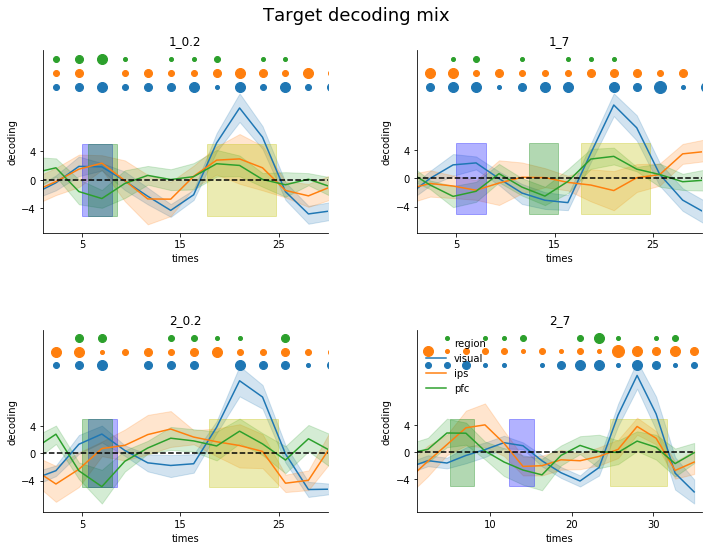

In [13]:
plot_decoding(Df_t_m, 'Target decoding mix')

n001


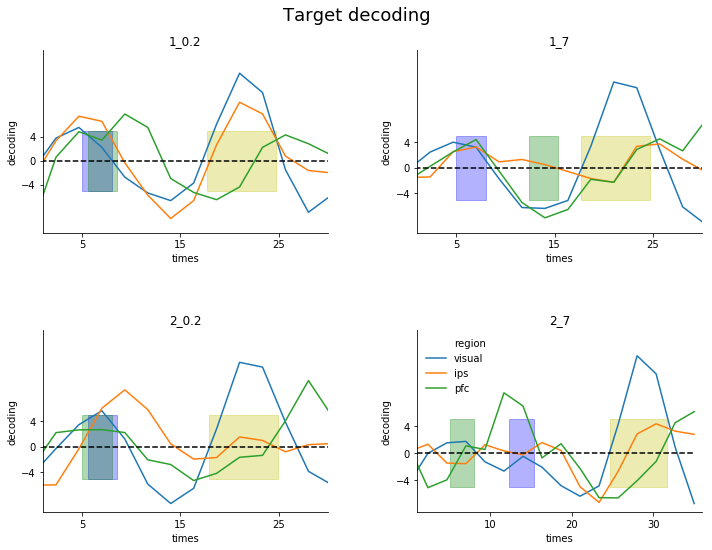

s001


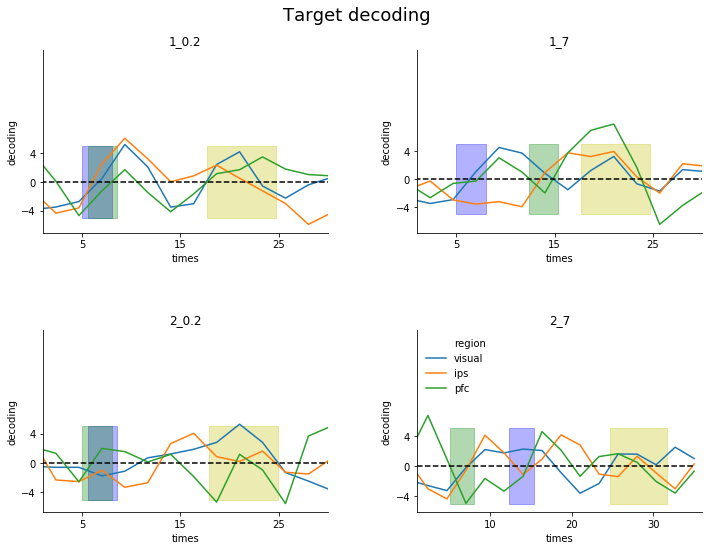

d001


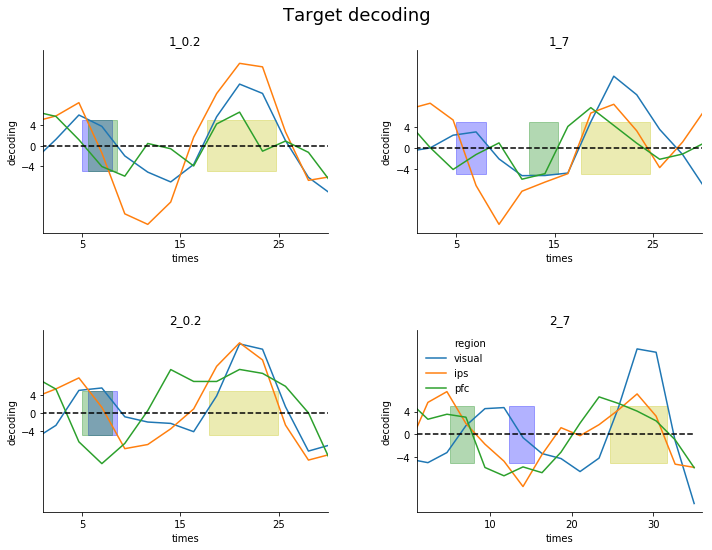

l001


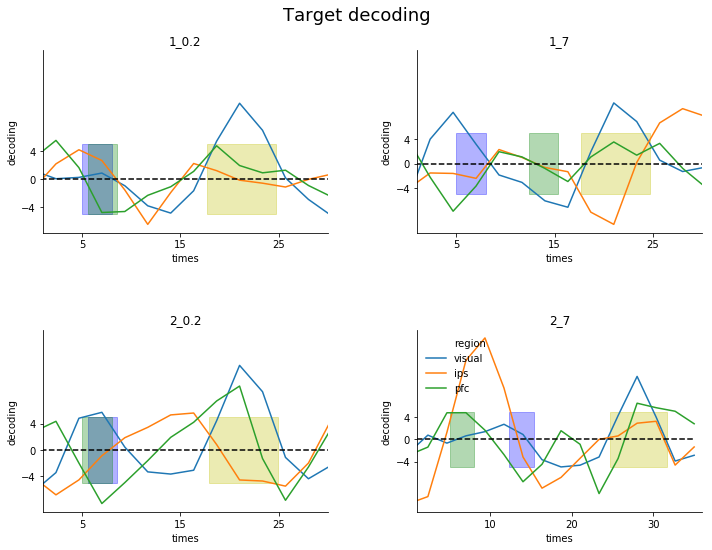

b001


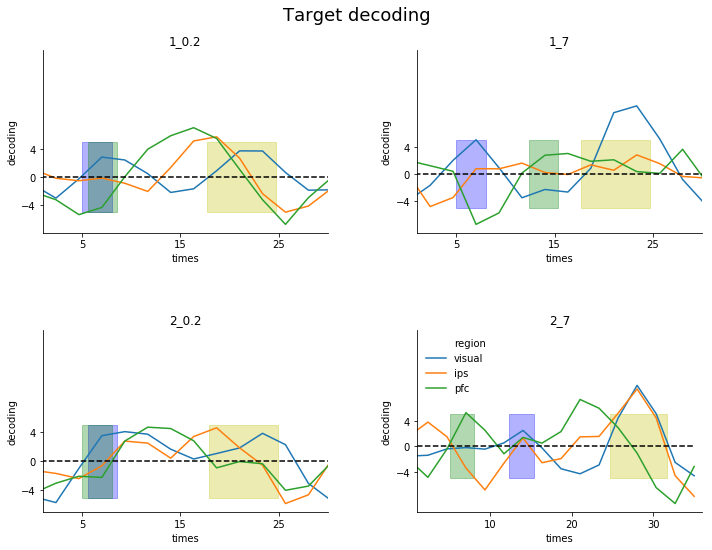

r001


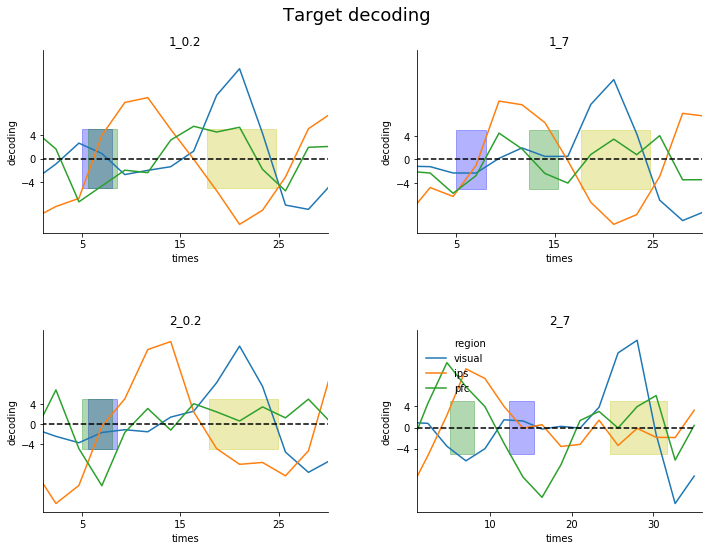

In [14]:
## plot subject by subject
for S in Df_t_m.subject.unique():
    print(S)
    plot_decoding(Df_t_m.loc[Df_t_m['subject']==S], 'Target decoding')

### Plot one subject! Use the shuffleing to make the CI (in the subject alone!)

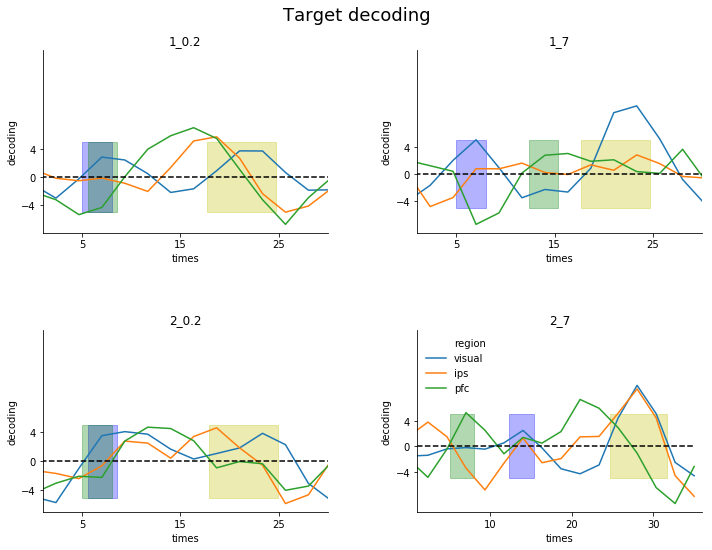

In [6]:
plot_decoding(Df_t_m.loc[Df_t_m['subject']=='b001'], 'Target decoding')

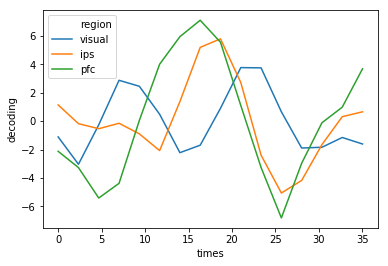

In [12]:
pal = sns.color_palette("tab10", n_colors=12, desat=1).as_hex()[0:3]
sns.lineplot(x="times", y="decoding", hue='region', ci=68, hue_order =  ['visual', 'ips', 'pfc'], 
             palette=pal, data=Df_t_m.loc[(Df_t_m['subject']=='b001') & (Df_t_m['condition']=='1_0.2')])




In [ ]:
plt.plot( Df_t_m.loc[(Df_t_m['subject']=='b001') & (Df_t_m['condition']=='1_0.2')].times, )

In [14]:
Df_t_m.loc[(Df_t_m['subject']=='b001') & (Df_t_m['condition']=='1_0.2')].times.unique()

array([ 0.   ,  2.335,  4.67 ,  7.005,  9.34 , 11.675, 14.01 , 16.345,
       18.68 , 21.015, 23.35 , 25.685, 28.02 , 30.355, 32.69 , 35.025])

In [16]:
Df_t_m.loc[(Df_t_m['subject']=='b001') & (Df_t_m['condition']=='1_0.2') & (Df_t_m['region']=='visual')].decoding

676   -1.115322
682   -3.037878
688   -0.261771
694    2.865238
700    2.445973
706    0.479297
712   -2.222227
718   -1.697189
724    0.899280
730    3.757840
736    3.740030
742    0.652349
748   -1.895316
754   -1.841846
760   -1.156010
766   -1.612449
Name: decoding, dtype: float64

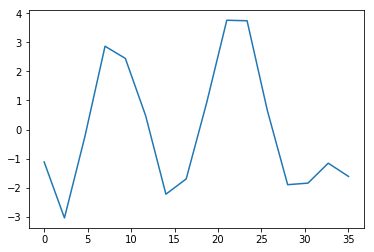

In [17]:
times = Df_t_m.loc[(Df_t_m['subject']=='b001') & (Df_t_m['condition']=='1_0.2')].times.unique()
dec = Df_t_m.loc[(Df_t_m['subject']=='b001') & (Df_t_m['condition']=='1_0.2') & (Df_t_m['region']=='visual')].decoding

plt.plot(times, dec)

In [ ]:

def plot_decoding_subject(df_plot, title_plot):
    ##
    ###
    ####   In the input dataframe you need the following columns:
    ###  'new_mean', 'inf', 'sup', 'brain_reg', 'time', 'condition'
    ## 
    pal = sns.color_palette("tab10", n_colors=12, desat=1).as_hex()[0:3]
    ##
    fig = plt.figure(figsize=(10,8))
    for indx_c, condition in enumerate(['1_0.2', '1_7', '2_0.2', '2_7']): 
        #features of the plot for the different conditions. Fixed values
        if condition == '1_0.2':
            delay1 = 0.2
            delay2 = 11.8
            cue=0
            t_p = cue + presentation_period_cue + pre_stim_period 
            d_p = t_p + presentation_period +delay1 
            r_t = d_p + presentation_period + delay2
            xlim = [1, 30]

        elif condition == '1_7':
            delay1 = 7
            delay2 = 5
            cue=0
            t_p = cue + presentation_period_cue + pre_stim_period 
            d_p = t_p + presentation_period +delay1 
            r_t = d_p + presentation_period + delay2
            xlim = [1, 30]

        elif condition == '2_0.2':
            delay1 = 0.2
            delay2 = 12
            cue=0
            d_p = cue + presentation_period_cue + pre_stim_period 
            t_p = d_p + presentation_period +delay1 
            r_t = t_p + presentation_period + delay2   
            xlim = [1, 30]

        elif condition == '2_7':
            delay1 = 7
            delay2 = 12
            cue=0
            d_p = cue + presentation_period_cue + pre_stim_period 
            t_p = d_p + presentation_period +delay1 
            r_t = t_p + presentation_period + delay2
            xlim = [1, 36]


        start_hrf = 4 #start of the Hemodynamic response (4seconds)
        sec_hdrf = 3 #time it can last

        d_p1 = (start_hrf + d_p) ##strat of didtractor (time)
        t_p1 = (start_hrf +t_p) ## strat of target (time)
        r_t1=  (start_hrf + r_t) ## start of response (time)
        #
        d_p2 = d_p1 + sec_hdrf # end of distractor (time)
        t_p2 = t_p1 + sec_hdrf # end of target (time)
        r_t2=  r_t1 + sec_hdrf + resp_time #end of response (time)

        y_vl_min = -5 #df_all_by_subj.Decoding.min() #values min and max
        y_vl_max = 5 #◙df_all_by_subj.Decoding.max()

        #fig = plt.figure()
        ax = fig.add_subplot(2,2, indx_c+1) 
        
        data_cond = df_plot.loc[df_plot['condition']==condition ]
        sns.lineplot( ax=ax, x="times", y="decoding", hue='region', ci=68,
                     hue_order =  ['visual', 'ips', 'pfc'], palette=pal, data=data_cond)
        plt.plot([0, 35], [0,0], 'k--')   ## plot chance level (0)
        plt.fill_between(  [ t_p1, t_p2 ], [y_vl_min, y_vl_min], [y_vl_max, y_vl_max], color='b', alpha=0.3) #, label='target'  ) #plot aprox time of target
        plt.fill_between(  [ d_p1, d_p2 ], [y_vl_min, y_vl_min], [y_vl_max, y_vl_max], color='g', alpha=0.3) #, label='distractor'  ) #plot aprox time of distractor
        plt.fill_between(  [ r_t1, r_t2 ], [y_vl_min, y_vl_min], [y_vl_max, y_vl_max], color='y', alpha=0.3) #, label='response'  )   #plot aprox time of response

        ## Plot the significance line
        #for idx_reg, reg in enumerate(['visual', 'ips', 'frontinf']):
        for idx_reg, reg in enumerate(['visual', 'ips', 'pfc']):
            subj_sig = [data_cond.loc[(data_cond['region']==reg) & (data_cond['times']==t_) ].significant.sum() for t_ in data_cond.times.unique()]    
            ## at least 3 sign subjects
            l=[]
            for n in subj_sig:
                if n<=1:
                    l.append(0)
                else:
                    l.append(n)
            ##
            for idx, t_ in enumerate(df_plot.times.unique()):
                plt.plot(t_, 13+(idx_reg*2) , marker = 'o', color=pal[idx_reg],  markersize=l[idx]*2 )
        #
        ###
        TITLE_BR = condition 
        plt.title(TITLE_BR) #condition title
        plt.gca().spines['right'].set_visible(False) #no right axis
        plt.gca().spines['top'].set_visible(False) #no  top axis
        plt.gca().get_xaxis().tick_bottom()
        plt.gca().get_yaxis().tick_left()
        plt.xticks([5,15,25]) #just this tcks
        plt.yticks([-4, 0 , 4])
        plt.xlim(xlim)
        plt.ylabel('decoding')
        if indx_c==3: #legend in just this condition (to avoid repetitions)       
            plt.gca().legend(loc= 2, frameon=False)
            plt.xticks([10, 20 ,30])

        else:
            plt.gca().legend(loc= 1, frameon=False).remove()



    ##
    plt.suptitle( title_plot, fontsize=18) ## main title
    plt.tight_layout(w_pad=5, h_pad=5, rect=[0, 0.03, 1, 0.95]) #correct the space between graphs
    plt.show(block=False) #show
    

    
#####

In [10]:
path_save_signal ='C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\signal_all_target_close.xlsx'
path_save_shuffle = 'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\shuff_all_target_close.xlsx'
decoding_element='target'
Df = pd.read_excel(path_save_signal) #convert them to pd.dataframes
Df_shuff = pd.read_excel(path_save_shuffle)

mean_center = []
for cond_ in Df.condition.unique(): #for condition
    for reg_ in Df.region.unique(): # for region
        for time_ in Df.times.unique(): #for time
            for subj_ in Df.subject.unique(): #for subject
                ### Take the mean by subject across time
                Mean= Df.loc[(Df['condition']==cond_) & (Df['region']==reg_) & 
                             (Df['subject']==subj_)].decoding.mean() ## all the tinmepoints of the subject (move to 0)
                
                ### Decoding value per subject and time
                decoding_subj = Df.loc[(Df['condition']==cond_) & (Df['region']==reg_) & (Df['subject']==subj_) & 
                                       (Df['times']==time_)].decoding.values[0] 
                Mean_center_subj = decoding_subj - Mean ##mean center subject time by time

                #### Compare this value with the pool of shuffles (100 values axis 0, 90, ...)
                shuffl_values = Df_shuff.loc[(Df_shuff['condition']==cond_) & (Df_shuff['region']==reg_) & 
                                             (Df_shuff['subject']==subj_) & (Df_shuff['times']==time_)].decoding.values
                #
                p_value = permutation_test([decoding_subj], shuffl_values, method='approximate', num_rounds=1000, seed=0)
                if p_value<0.05:
                    sign=True
                else:
                    sign=False
                ## save results
                mean_center.append( [cond_, reg_, time_, Mean_center_subj, subj_, sign, p_value, decoding_element  ])
                
            
    

Df_t_c = pd.DataFrame(mean_center)
Df_t_c.columns=['condition', 'region', 'times', 'decoding', 'subject', 'significant', 'pvalue', 'decoding_element']
##Df_mc ## dataframe to plot


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


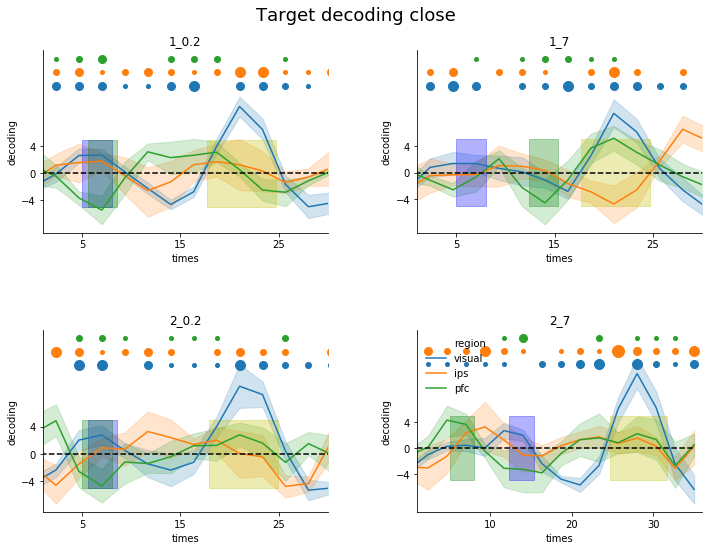

In [11]:
plot_decoding(Df_t_c, 'Target decoding close')

In [12]:
path_save_signal ='C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\signal_all_target_far.xlsx'
path_save_shuffle = 'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\shuff_all_target_far.xlsx'
decoding_element='target'
Df = pd.read_excel(path_save_signal) #convert them to pd.dataframes
Df_shuff = pd.read_excel(path_save_shuffle)

mean_center = []
for cond_ in Df.condition.unique(): #for condition
    for reg_ in Df.region.unique(): # for region
        for time_ in Df.times.unique(): #for time
            for subj_ in Df.subject.unique(): #for subject
                ### Take the mean by subject across time
                Mean= Df.loc[(Df['condition']==cond_) & (Df['region']==reg_) & 
                             (Df['subject']==subj_)].decoding.mean() ## all the tinmepoints of the subject (move to 0)
                
                ### Decoding value per subject and time
                decoding_subj = Df.loc[(Df['condition']==cond_) & (Df['region']==reg_) & (Df['subject']==subj_) & 
                                       (Df['times']==time_)].decoding.values[0] 
                Mean_center_subj = decoding_subj - Mean ##mean center subject time by time

                #### Compare this value with the pool of shuffles (100 values axis 0, 90, ...)
                shuffl_values = Df_shuff.loc[(Df_shuff['condition']==cond_) & (Df_shuff['region']==reg_) & 
                                             (Df_shuff['subject']==subj_) & (Df_shuff['times']==time_)].decoding.values
                #
                p_value = permutation_test([decoding_subj], shuffl_values, method='approximate', num_rounds=1000, seed=0)
                if p_value<0.05:
                    sign=True
                else:
                    sign=False
                ## save results
                mean_center.append( [cond_, reg_, time_, Mean_center_subj, subj_, sign, p_value, decoding_element  ])
                
            
    

Df_t_f = pd.DataFrame(mean_center)
Df_t_f.columns=['condition', 'region', 'times', 'decoding', 'subject', 'significant', 'pvalue', 'decoding_element']
##Df_mc ## dataframe to plot

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


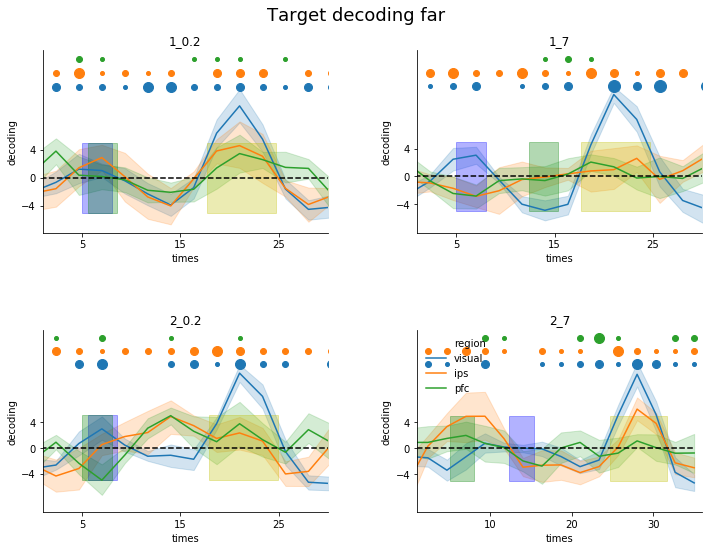

In [13]:
plot_decoding(Df_t_f, 'Target decoding far')

In [ ]:
## plot subject by subject
# for S in Df_.subject.unique():
#     print(S)
#     plot_decoding(Df_.loc[Df_['subject']==S], 'Target decoding')

### Distractor 

In [4]:
path_save_signal ='C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\signal_all_distractor_mix.xlsx'
path_save_shuffle = 'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\shuff_all_distractor_mix.xlsx'
decoding_element='distractor'
Df = pd.read_excel(path_save_signal) #convert them to pd.dataframes
Df_shuff = pd.read_excel(path_save_shuffle)

mean_center = []
for cond_ in Df.condition.unique(): #for condition
    for reg_ in Df.region.unique(): # for region
        for time_ in Df.times.unique(): #for time
            for subj_ in Df.subject.unique(): #for subject
                ### Take the mean by subject across time
                Mean= Df.loc[(Df['condition']==cond_) & (Df['region']==reg_) & 
                             (Df['subject']==subj_)].decoding.mean() ## all the tinmepoints of the subject (move to 0)
                
                ### Decoding value per subject and time
                decoding_subj = Df.loc[(Df['condition']==cond_) & (Df['region']==reg_) & (Df['subject']==subj_) & 
                                       (Df['times']==time_)].decoding.values[0] 
                Mean_center_subj = decoding_subj - Mean ##mean center subject time by time

                #### Compare this value with the pool of shuffles (100 values axis 0, 90, ...)
                shuffl_values = Df_shuff.loc[(Df_shuff['condition']==cond_) & (Df_shuff['region']==reg_) & 
                                             (Df_shuff['subject']==subj_) & (Df_shuff['times']==time_)].decoding.values
                #
                p_value = permutation_test([decoding_subj], shuffl_values, method='approximate', num_rounds=1000, seed=0)
                if p_value<0.05:
                    sign=True
                else:
                    sign=False
                ## save results
                mean_center.append( [cond_, reg_, time_, Mean_center_subj, subj_, sign, p_value, decoding_element  ])
                
            
    

Df_d_m = pd.DataFrame(mean_center)
Df_d_m.columns=['condition', 'region', 'times', 'decoding', 'subject', 'significant', 'pvalue', 'decoding_element']
##Df_mc ## dataframe to plot

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


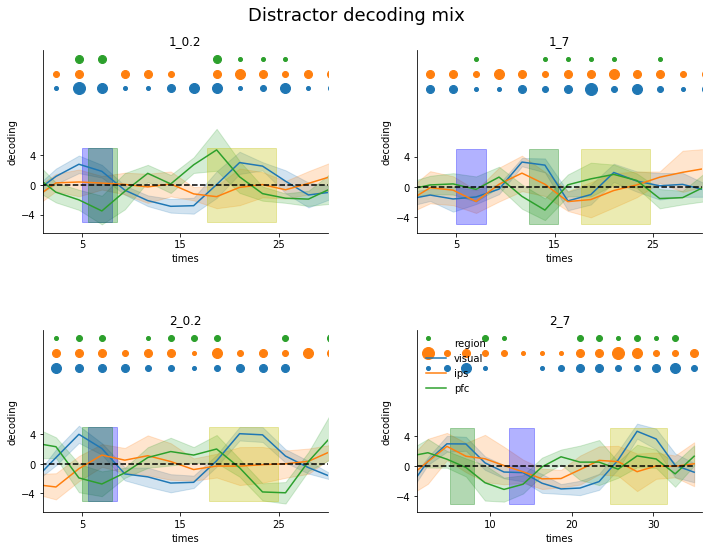

In [5]:
plot_decoding(Df_d_m, 'Distractor decoding mix')

In [16]:
path_save_signal ='C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\signal_all_distractor_close.xlsx'
path_save_shuffle = 'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\shuff_all_distractor_close.xlsx'
decoding_element='distractor'
Df = pd.read_excel(path_save_signal) #convert them to pd.dataframes
Df_shuff = pd.read_excel(path_save_shuffle)

mean_center = []
for cond_ in Df.condition.unique(): #for condition
    for reg_ in Df.region.unique(): # for region
        for time_ in Df.times.unique(): #for time
            for subj_ in Df.subject.unique(): #for subject
                ### Take the mean by subject across time
                Mean= Df.loc[(Df['condition']==cond_) & (Df['region']==reg_) & 
                             (Df['subject']==subj_)].decoding.mean() ## all the tinmepoints of the subject (move to 0)
                
                ### Decoding value per subject and time
                decoding_subj = Df.loc[(Df['condition']==cond_) & (Df['region']==reg_) & (Df['subject']==subj_) & 
                                       (Df['times']==time_)].decoding.values[0] 
                Mean_center_subj = decoding_subj - Mean ##mean center subject time by time

                #### Compare this value with the pool of shuffles (100 values axis 0, 90, ...)
                shuffl_values = Df_shuff.loc[(Df_shuff['condition']==cond_) & (Df_shuff['region']==reg_) & 
                                             (Df_shuff['subject']==subj_) & (Df_shuff['times']==time_)].decoding.values
                #
                p_value = permutation_test([decoding_subj], shuffl_values, method='approximate', num_rounds=1000, seed=0)
                if p_value<0.05:
                    sign=True
                else:
                    sign=False
                ## save results
                mean_center.append( [cond_, reg_, time_, Mean_center_subj, subj_, sign, p_value, decoding_element  ])
                
            
    

Df_d_c = pd.DataFrame(mean_center)
Df_d_c.columns=['condition', 'region', 'times', 'decoding', 'subject', 'significant', 'pvalue', 'decoding_element']
##Df_mc ## dataframe to plot

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


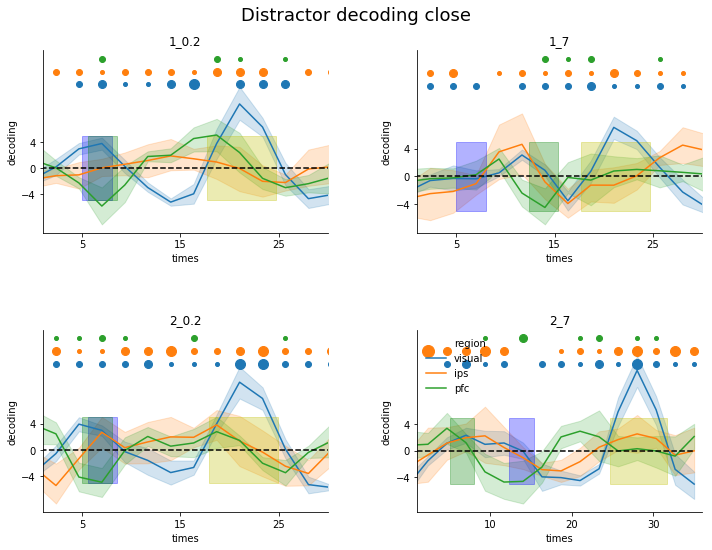

In [17]:
plot_decoding(Df_d_c, 'Distractor decoding close')

In [15]:
path_save_signal ='C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\signal_all_distractor_far.xlsx'
path_save_shuffle = 'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\shuff_all_distractor_far.xlsx'
decoding_element='distractor'
Df = pd.read_excel(path_save_signal) #convert them to pd.dataframes
Df_shuff = pd.read_excel(path_save_shuffle)

mean_center = []
for cond_ in Df.condition.unique(): #for condition
    for reg_ in Df.region.unique(): # for region
        for time_ in Df.times.unique(): #for time
            for subj_ in Df.subject.unique(): #for subject
                ### Take the mean by subject across time
                Mean= Df.loc[(Df['condition']==cond_) & (Df['region']==reg_) & 
                             (Df['subject']==subj_)].decoding.mean() ## all the tinmepoints of the subject (move to 0)
                
                ### Decoding value per subject and time
                decoding_subj = Df.loc[(Df['condition']==cond_) & (Df['region']==reg_) & (Df['subject']==subj_) & 
                                       (Df['times']==time_)].decoding.values[0] 
                Mean_center_subj = decoding_subj - Mean ##mean center subject time by time

                #### Compare this value with the pool of shuffles (100 values axis 0, 90, ...)
                shuffl_values = Df_shuff.loc[(Df_shuff['condition']==cond_) & (Df_shuff['region']==reg_) & 
                                             (Df_shuff['subject']==subj_) & (Df_shuff['times']==time_)].decoding.values
                #
                p_value = permutation_test([decoding_subj], shuffl_values, method='approximate', num_rounds=1000, seed=0)
                if p_value<0.05:
                    sign=True
                else:
                    sign=False
                ## save results
                mean_center.append( [cond_, reg_, time_, Mean_center_subj, subj_, sign, p_value, decoding_element  ])
                
            
    

Df_d_f = pd.DataFrame(mean_center)
Df_d_f.columns=['condition', 'region', 'times', 'decoding', 'subject', 'significant', 'pvalue', 'decoding_element']
##Df_mc ## dataframe to plot

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


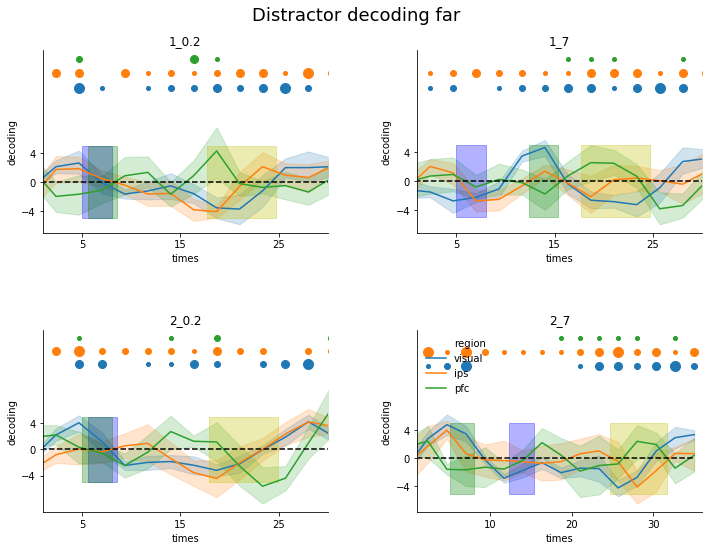

In [16]:
plot_decoding(Df_d_f, 'Distractor decoding far')

n001


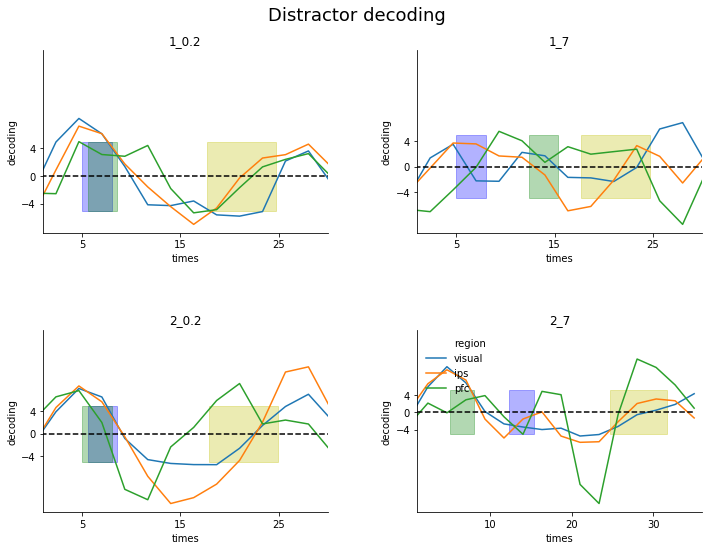

s001


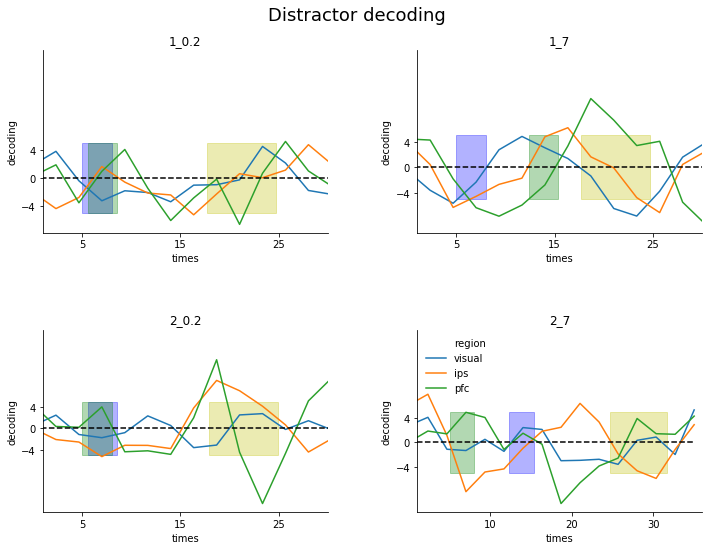

d001


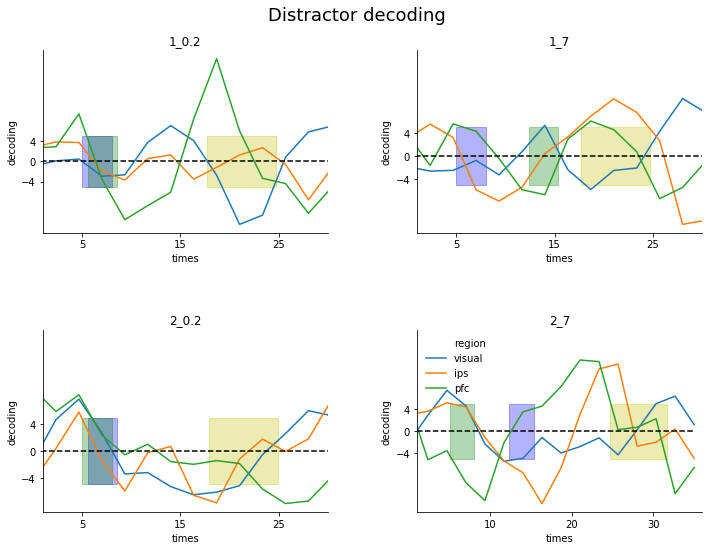

l001


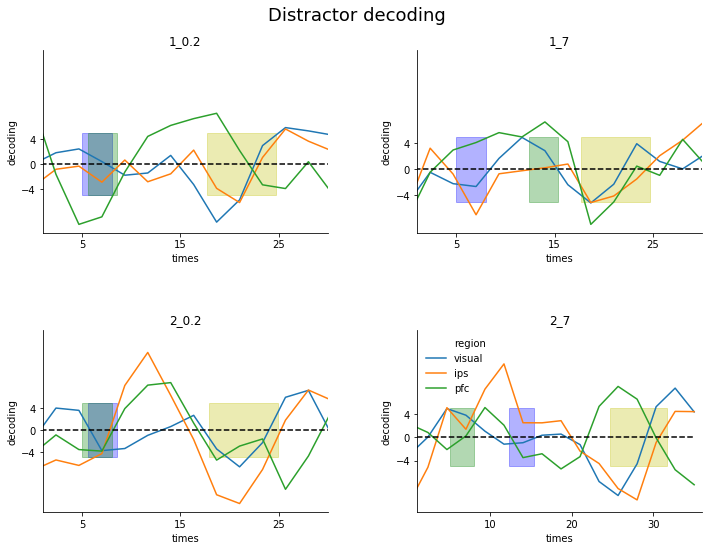

b001


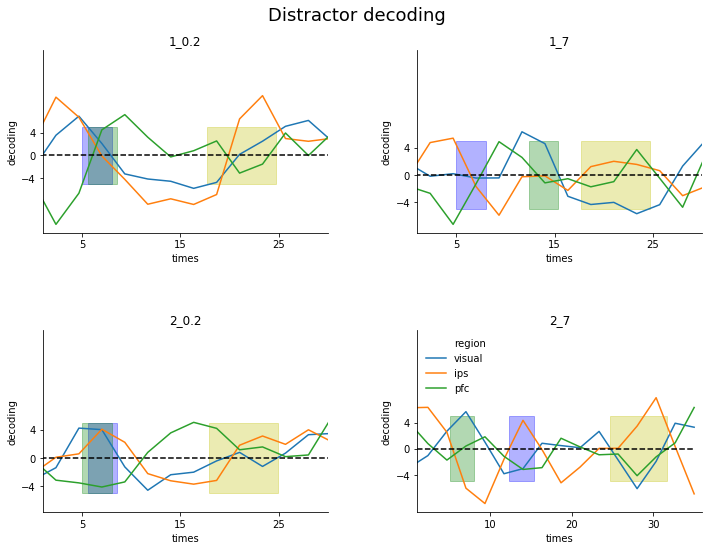

r001


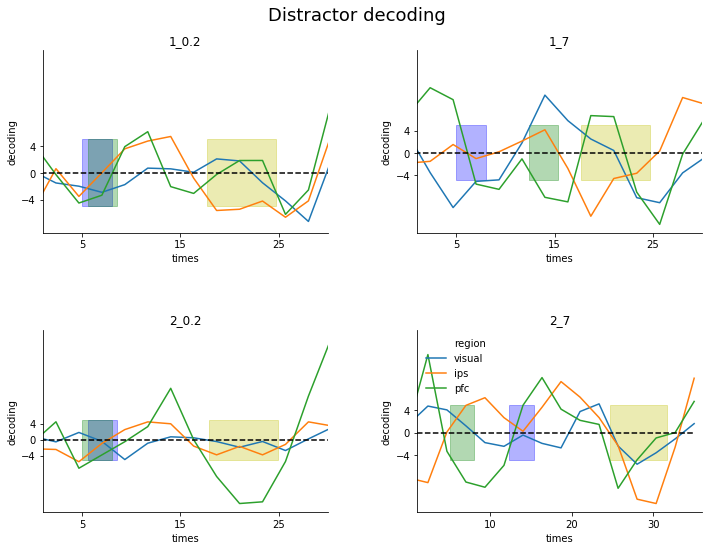

In [17]:
## plot subject by subject
for S in Df_d_f.subject.unique():
    print(S)
    plot_decoding(Df_d_f.loc[Df_d_f['subject']==S], 'Distractor decoding')

## Plot by region

In [23]:
df_mix = pd.concat([Df_t_m, Df_d_m])
df_far = pd.concat([Df_t_f, Df_d_f])
df_close = pd.concat([Df_t_c, Df_d_c])


In [24]:

def plot_decoding_region(df_plot, region_plot, decoding_plots):
    ##
    ###
    ####   In the input dataframe you need the following columns:
    ###  'new_mean', 'inf', 'sup', 'brain_reg', 'time', 'condition'
    ## 
    pal = sns.color_palette("tab10", n_colors=12, desat=1).as_hex()[0:len(decoding_plots)]
    ##
    fig = plt.figure(figsize=(10,8))
    for indx_c, condition in enumerate(['1_0.2', '1_7', '2_0.2', '2_7']): 
        #features of the plot for the different conditions. Fixed values
        if condition == '1_0.2':
            delay1 = 0.2
            delay2 = 11.8
            cue=0
            t_p = cue + presentation_period_cue + pre_stim_period 
            d_p = t_p + presentation_period +delay1 
            r_t = d_p + presentation_period + delay2
            xlim = [1, 30]

        elif condition == '1_7':
            delay1 = 7
            delay2 = 5
            cue=0
            t_p = cue + presentation_period_cue + pre_stim_period 
            d_p = t_p + presentation_period +delay1 
            r_t = d_p + presentation_period + delay2
            xlim = [1, 30]

        elif condition == '2_0.2':
            delay1 = 0.2
            delay2 = 12
            cue=0
            d_p = cue + presentation_period_cue + pre_stim_period 
            t_p = d_p + presentation_period +delay1 
            r_t = t_p + presentation_period + delay2   
            xlim = [1, 30]

        elif condition == '2_7':
            delay1 = 7
            delay2 = 12
            cue=0
            d_p = cue + presentation_period_cue + pre_stim_period 
            t_p = d_p + presentation_period +delay1 
            r_t = t_p + presentation_period + delay2
            xlim = [1, 36]


        start_hrf = 4 #start of the Hemodynamic response (4seconds)
        sec_hdrf = 3 #time it can last

        d_p1 = (start_hrf + d_p) ##strat of didtractor (time)
        t_p1 = (start_hrf +t_p) ## strat of target (time)
        r_t1=  (start_hrf + r_t) ## start of response (time)
        #
        d_p2 = d_p1 + sec_hdrf # end of distractor (time)
        t_p2 = t_p1 + sec_hdrf # end of target (time)
        r_t2=  r_t1 + sec_hdrf + resp_time #end of response (time)

        y_vl_min = -5 #df_all_by_subj.Decoding.min() #values min and max
        y_vl_max = 5 #◙df_all_by_subj.Decoding.max()

        #fig = plt.figure()
        ax = fig.add_subplot(2,2, indx_c+1) 
        
        data_cond = df_plot.loc[(df_plot['condition']==condition) & (df_plot['region']==region_plot) ]
        sns.lineplot( ax=ax, x="times", y="decoding", hue='decoding_element', hue_order = decoding_plots, palette=pal, data=data_cond)
        plt.plot([0, 35], [0,0], 'k--')   ## plot chance level (0)
        plt.fill_between(  [ t_p1, t_p2 ], [y_vl_min, y_vl_min], [y_vl_max, y_vl_max], color='b', alpha=0.3) #, label='target'  ) #plot aprox time of target
        plt.fill_between(  [ d_p1, d_p2 ], [y_vl_min, y_vl_min], [y_vl_max, y_vl_max], color='g', alpha=0.3) #, label='distractor'  ) #plot aprox time of distractor
        plt.fill_between(  [ r_t1, r_t2 ], [y_vl_min, y_vl_min], [y_vl_max, y_vl_max], color='y', alpha=0.3) #, label='response'  )   #plot aprox time of response

        ## Plot the significance line
        for idx_decoding_element, decoding_element in enumerate(decoding_plots):
            subj_sig = [data_cond.loc[(data_cond['decoding_element']==decoding_element) & (data_cond['times']==t_) ].significant.sum() for t_ in data_cond.times.unique()]    
            ## at least 3 sign subjects
            l=[]
            for n in subj_sig:
                if n<=1:
                    l.append(0)
                else:
                    l.append(n)
            ##
            for idx, t_ in enumerate(df_plot.times.unique()):
                plt.plot(t_, 13+(idx_decoding_element*2) , marker = 'o', color=pal[idx_decoding_element],  markersize=l[idx]*2 )
        #
        ###
        TITLE_BR = condition 
        plt.title(TITLE_BR) #condition title
        plt.gca().spines['right'].set_visible(False) #no right axis
        plt.gca().spines['top'].set_visible(False) #no  top axis
        plt.gca().get_xaxis().tick_bottom()
        plt.gca().get_yaxis().tick_left()
        plt.xticks([5,15,25]) #just this tcks
        plt.yticks([-4, 0 , 4])
        plt.xlim(xlim)
        plt.ylabel('decoding')
        if indx_c==3: #legend in just this condition (to avoid repetitions)       
            plt.gca().legend(loc= 2, frameon=False)
            plt.xticks([10, 20 ,30])

        else:
            plt.gca().legend(loc= 1, frameon=False).remove()



    ##
    plt.suptitle(region_plot, fontsize=18) ## main title
    plt.tight_layout(w_pad=5, h_pad=5, rect=[0, 0.03, 1, 0.95]) #correct the space between graphs
    plt.show(block=False) #show
    


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


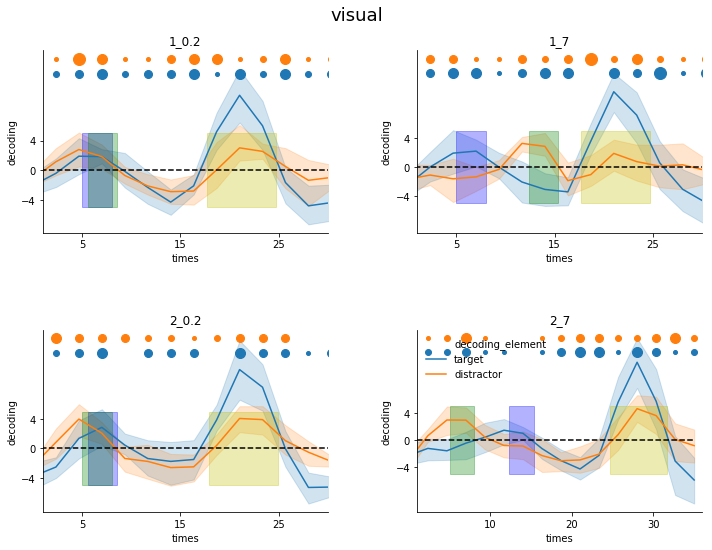

In [25]:
plot_decoding_region(df_mix, 'visual', ['target', 'distractor'])


n001


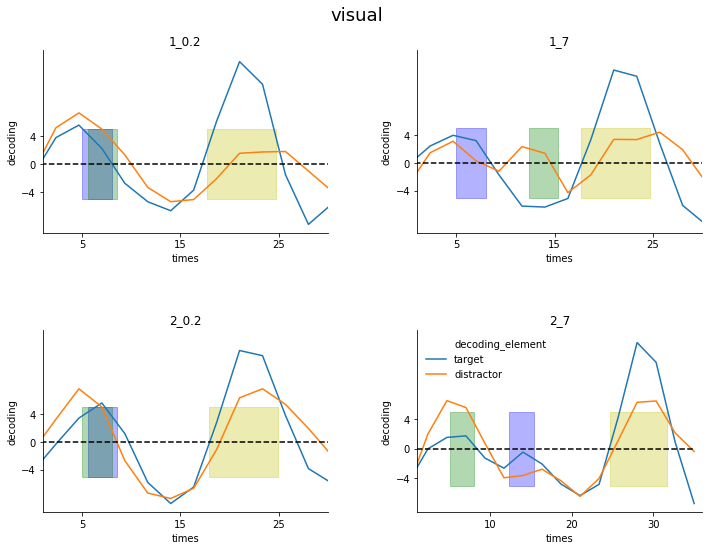

s001


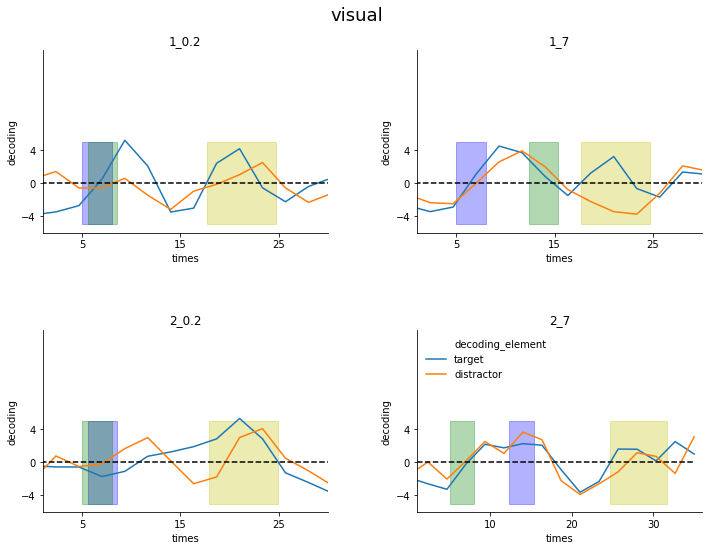

d001


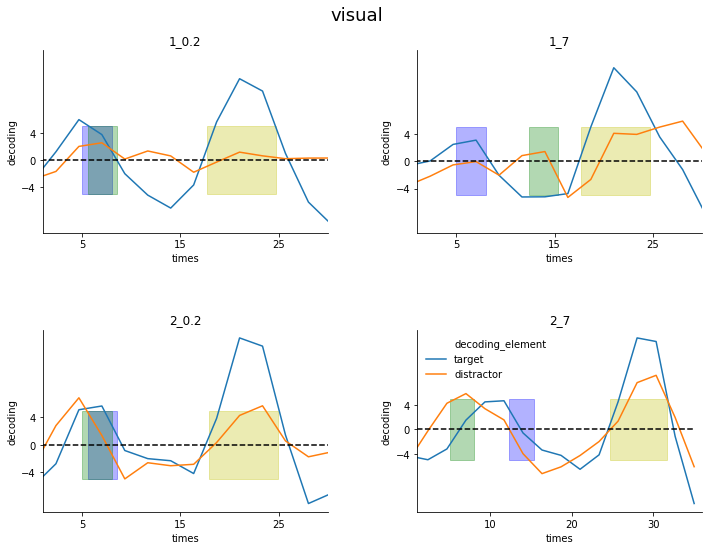

l001


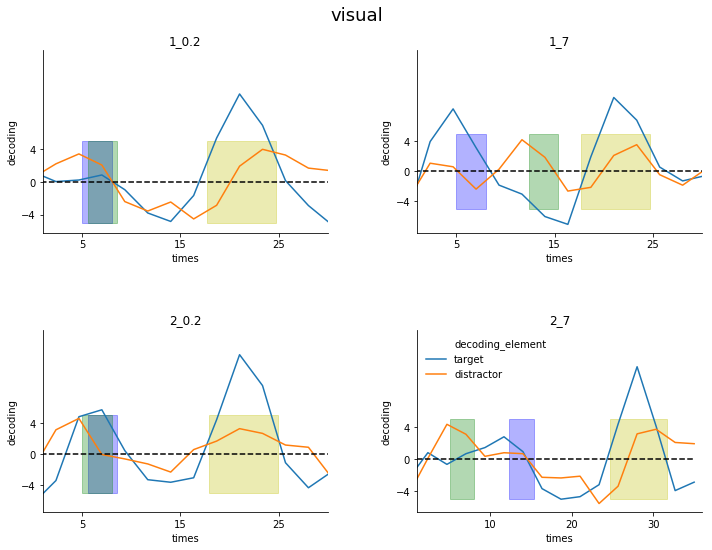

b001


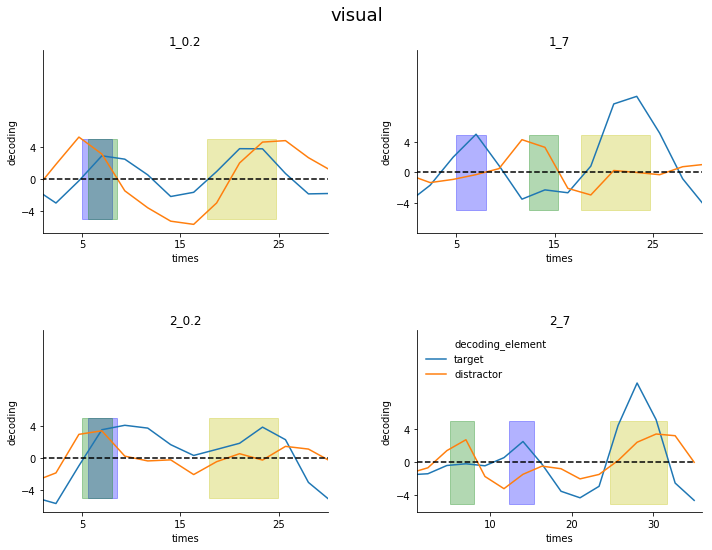

r001


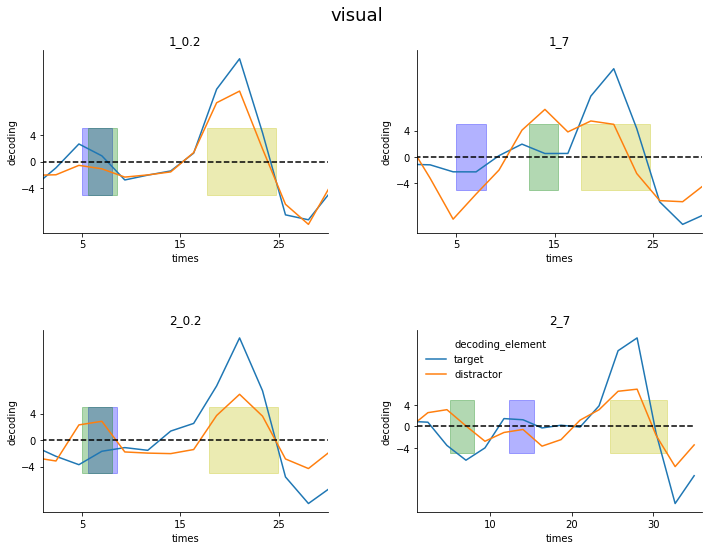

In [29]:
for S in df_mix.subject.unique():
    print(S)
    plot_decoding_region(df_mix.loc[df_mix['subject']==S], 'visual', ['target', 'distractor'])


In [36]:
##base on the response, how many TR move forward (only) in each subject
dict_move={}
dict_move['n001']=1
dict_move['s001']=0
dict_move['r001']=1
dict_move['l001']=1
dict_move['d001']=1
dict_move['b001']=0

### previously used
# dict_move['n001']=1
# dict_move['s001']=2
# dict_move['r001']=2
# dict_move['l001']=2
# dict_move['d001']=1
# dict_move['b001']=1


In [ ]:
#Example with mix distance
###move certain TRs based on visual hemodynamic! 
df_times_mix = pd.concat([Df_t_m, Df_d_m])
df_times_mix['correct_times']=df_times_mix['times'].copy()
df_times_mix.head(10)

for subj in df_times_mix.subject.unique():
    df_times_mix.loc[df_times_mix['subject']==subj , 'times' ] = df_times_mix.loc[df_times_mix['subject']==subj , 'times' ].replace(df_times_mix.correct_times.unique(), np.linspace(0,  24*2.335, 25 )[dict_move[subj]:16+dict_move[subj]] ) 

    

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


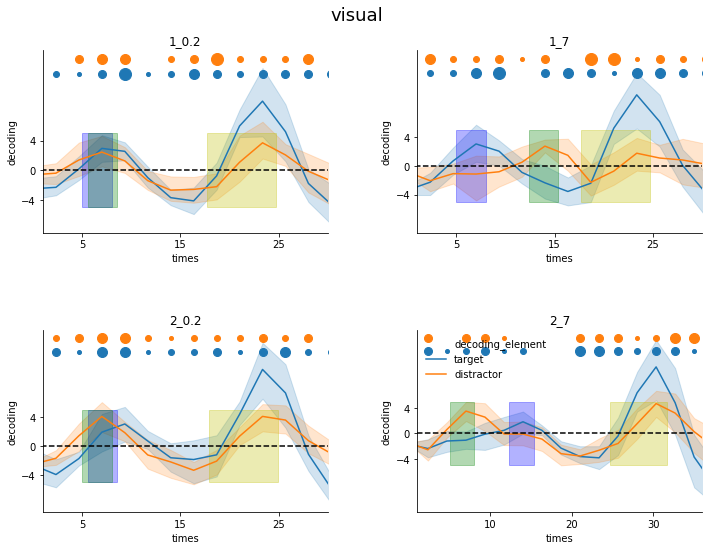

In [37]:
plot_decoding_region(df_times_mix, 'visual', ['target', 'distractor'])

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


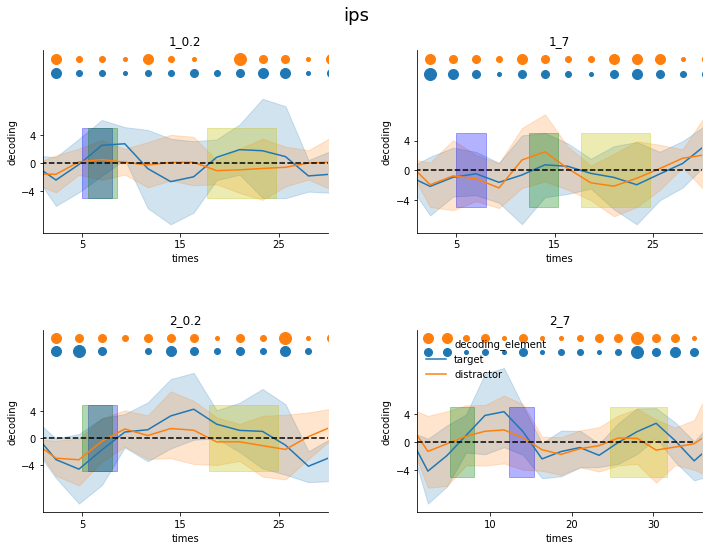

In [38]:
plot_decoding_region(df_times_mix, 'ips', ['target', 'distractor'])

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


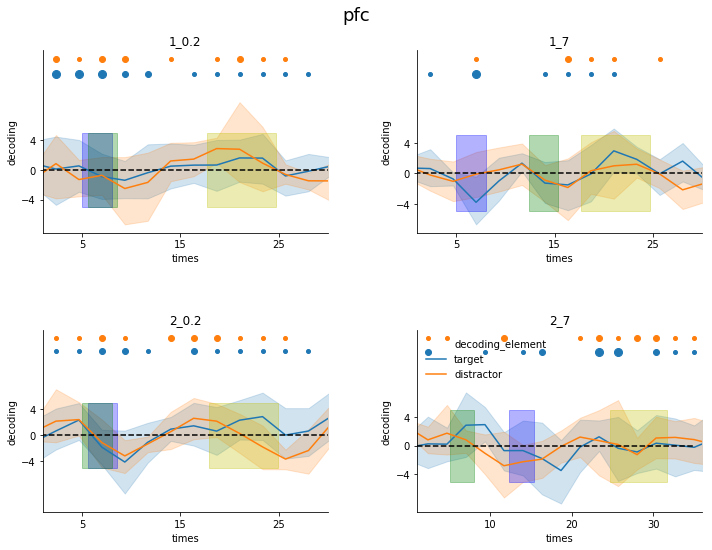

In [39]:
plot_decoding_region(df_times_mix, 'pfc', ['target', 'distractor'])